In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/davio606/CS-4774-data/master/data.csv'
data = pd.read_csv(url)
data.head(10)

data.drop(data.loc[data['Make'] == "Ferrari"].index, inplace=True)
data.drop(data.loc[data['Make'] == "McLaren"].index, inplace=True)
data.drop(data.loc[data['Make'] == "Bentley"].index, inplace=True)
data.drop(data.loc[data['Make'] == "Lamborghini"].index, inplace=True)
data.drop(data.loc[data['Make'] == "Aston Martin"].index, inplace=True)
data.drop(data.loc[data['Make'] == "Bugatti"].index, inplace=True)
data.drop(data.loc[data['Make'] == "Maybach"].index, inplace=True)
data.drop(data.loc[data['Make'] == "Spyker"].index, inplace=True)
data.drop(data.loc[data['Make'] == "Rolls-Royce"].index, inplace=True)
data.drop(data.loc[data['Make'] == "Maserati"].index, inplace=True)

In [0]:
data.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
10608,Chevrolet,TrailBlazer,2007,regular unleaded,291.0,6.0,AUTOMATIC,rear wheel drive,4.0,NaN,Midsize,4dr SUV,20,14,1385,25045
6673,Chevrolet,Malibu,2015,premium unleaded (recommended),259.0,4.0,AUTOMATIC,front wheel drive,4.0,Performance,Midsize,Sedan,30,21,1385,30355
9043,Hyundai,Scoupe,1993,regular unleaded,92.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,32,23,1439,2000
8608,Volkswagen,Routan,2010,regular unleaded,251.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,25,17,873,42500
7419,Porsche,Panamera,2015,premium unleaded (required),420.0,6.0,AUTOMATED_MANUAL,all wheel drive,4.0,"Luxury,High-Performance",Large,Sedan,27,17,1715,98300


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11661 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11661 non-null object
Model                11661 non-null object
Year                 11661 non-null int64
Engine Fuel Type     11658 non-null object
Engine HP            11592 non-null float64
Engine Cylinders     11631 non-null float64
Transmission Type    11661 non-null object
Driven_Wheels        11661 non-null object
Number of Doors      11656 non-null float64
Market Category      7919 non-null object
Vehicle Size         11661 non-null object
Vehicle Style        11661 non-null object
highway MPG          11661 non-null int64
city mpg             11661 non-null int64
Popularity           11661 non-null int64
MSRP                 11661 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [0]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11661.000000,11592.000000,11631.000000,11656.000000,11661.000000,11661.000000,11661.000000,11661.000000
mean,2010.375268,242.874310,5.524804,3.456675,26.831490,19.916902,1563.058571,34726.121345
std,7.632319,99.898441,1.627700,0.870417,8.848554,8.992948,1448.311050,31501.508840
min,1990.000000,55.000000,0.000000,2.000000,12.000000,9.000000,21.000000,2000.000000
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,20825.000000
50%,2015.000000,220.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,29645.000000
75%,2016.000000,296.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,41150.000000
max,2017.000000,707.000000,12.000000,4.000000,354.000000,137.000000,5657.000000,495000.000000


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


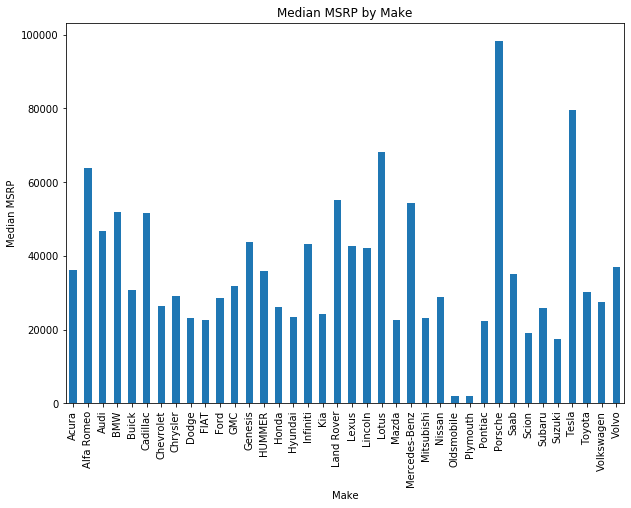

In [0]:
%pylab inline
Make=data.groupby(['Make'])['MSRP'].median()
Make.plot(kind='bar',stacked=True, figsize=(10, 7))
pylab.ylabel('Median MSRP')
pylab.title('Median MSRP by Make')
show()

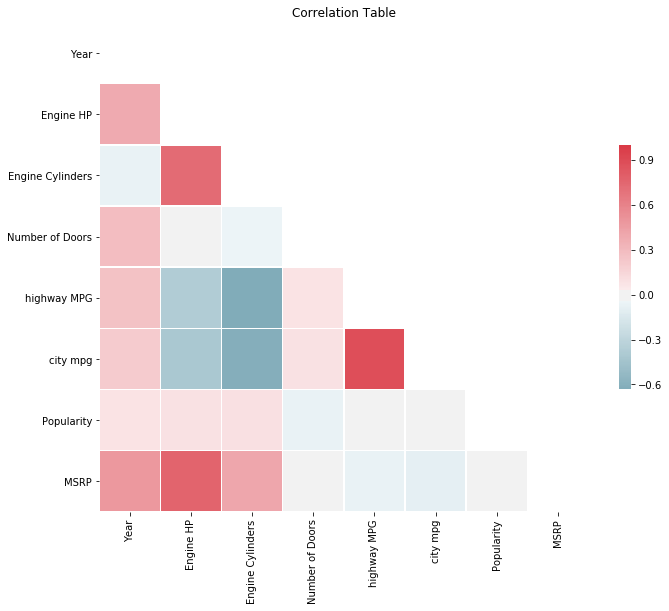

In [0]:
corr=data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Table")
plt.show()


In [0]:
data.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


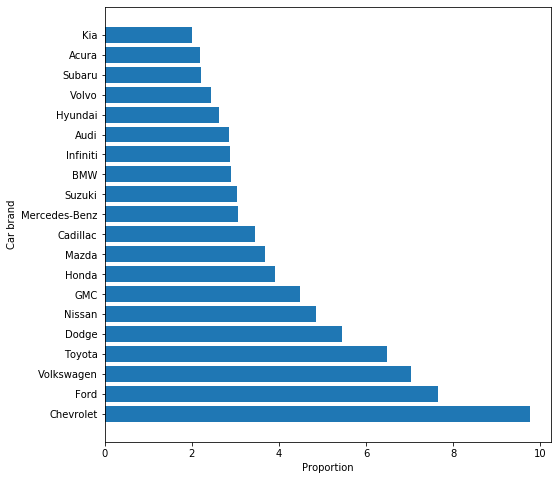

In [0]:
# Percentage of car per brand
counts = data['Make'].value_counts()*100/sum(data['Make'].value_counts())

# 9 most present labels
popular_labels = counts.index[:20]
    
# Plot
plt.figure(figsize=(8,8))
plt.barh(popular_labels, width=counts[:20])
plt.xlabel('Proportion')
plt.ylabel('Car brand')
plt.show()

In [0]:
x = data['Make'].unique()
print(len(x))

48


In [0]:
data['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [0]:
prices = data[['Make','MSRP']].loc[(data['Make'] == 'Chevrolet')|
               (data['Make'] == 'Ford')|
               (data['Make'] == 'Volkswagen')|
               (data['Make'] == 'Toyota')|
               (data['Make'] == 'Dodge')|
               (data['Make'] == 'Nissan')|
               (data['Make'] == 'GMC')|
               (data['Make'] == 'Honda')|
               (data['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                    MSRP
Make                    
Chevrolet   28350.385574
Dodge       22390.059105
Ford        27399.266742
GMC         30493.299029
Honda       26674.340757
Mazda       20039.382979
Nissan      28583.431900
Toyota      29030.016086
Volkswagen  28102.380717


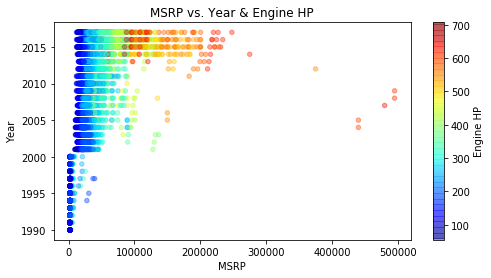

In [0]:
# plt.scatter(data['MSRP'], data['highway MPG'])
data.plot(kind="scatter", x="MSRP", y="Year", alpha=0.4,
      figsize=(8,4), c="Engine HP", cmap=plt.get_cmap("jet"), colorbar=True,
      sharex=False)
plt.title('MSRP vs. Year & Engine HP')
plt.xlabel('MSRP')
plt.ylabel('Year')

plt.show()

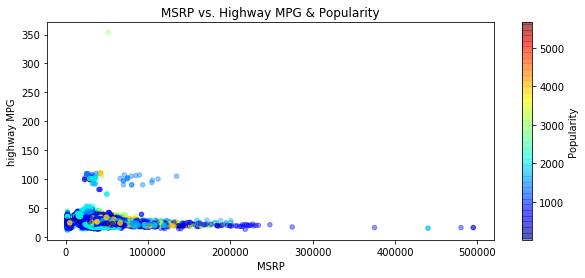

In [0]:
data.plot(kind="scatter", x="MSRP", y="highway MPG", alpha=0.4,
      figsize=(10,4), c="Popularity", cmap=plt.get_cmap("jet"), colorbar=True,
      sharex=False, title= "MSRP vs. Highway MPG & Popularity")


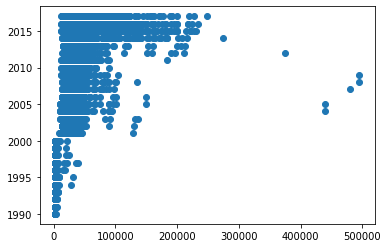

In [0]:
plt.scatter(data['MSRP'], data['Year'])
plt.show()

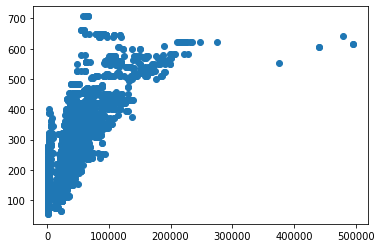

In [0]:
plt.scatter(data['MSRP'], data['Engine HP'])
plt.show()

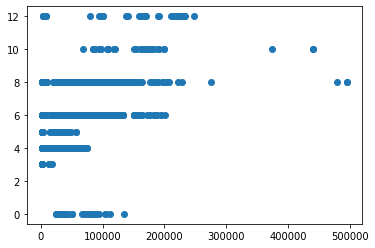

In [0]:
plt.scatter(data['MSRP'], data['Engine Cylinders'])
plt.show()